In [14]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = 'data'

In [15]:
df = pd.read_csv(os.path.join(data_dir, 'CSF_COG_PET_data_cleaned.csv'), low_memory=False)

In [16]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 187 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    TAU_bl                         543 non-null    float64
 1    PTAU_bl                        543 non-null    float64
 2    ABETA_bl                       543 non-null    float64
 3    DX_bl                          543 non-null    int64  
 4    DX                             543 non-null    int64  
 5    AGE                            543 non-null    float64
 6    PTGENDER                       543 non-null    int64  
 7    PTEDUCAT                       543 non-null    int64  
 8    MMSE_bl                        543 non-null    float64
 9    EcogPtTotal_bl                 543 non-null    float64
 10   FHQMOM                         543 non-null    float64
 11   FHQMOMAD                       543 non-null    float64
 12   FHQDAD                         543

In [17]:
correlation_matrix = df.corr()

['TAU_bl', 'PTAU_bl', 'ABETA_bl', 'DX_bl', 'DX', 'AGE', 'PTGENDER', 'PTEDUCAT', 'MMSE_bl', 'EcogPtTotal_bl', 'FHQMOM', 'FHQMOMAD', 'FHQDAD', 'FHQDADAD', 'LDELTOTAL_BL', 'mPACCdigit_bl', 'mPACCtrailsB_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl']


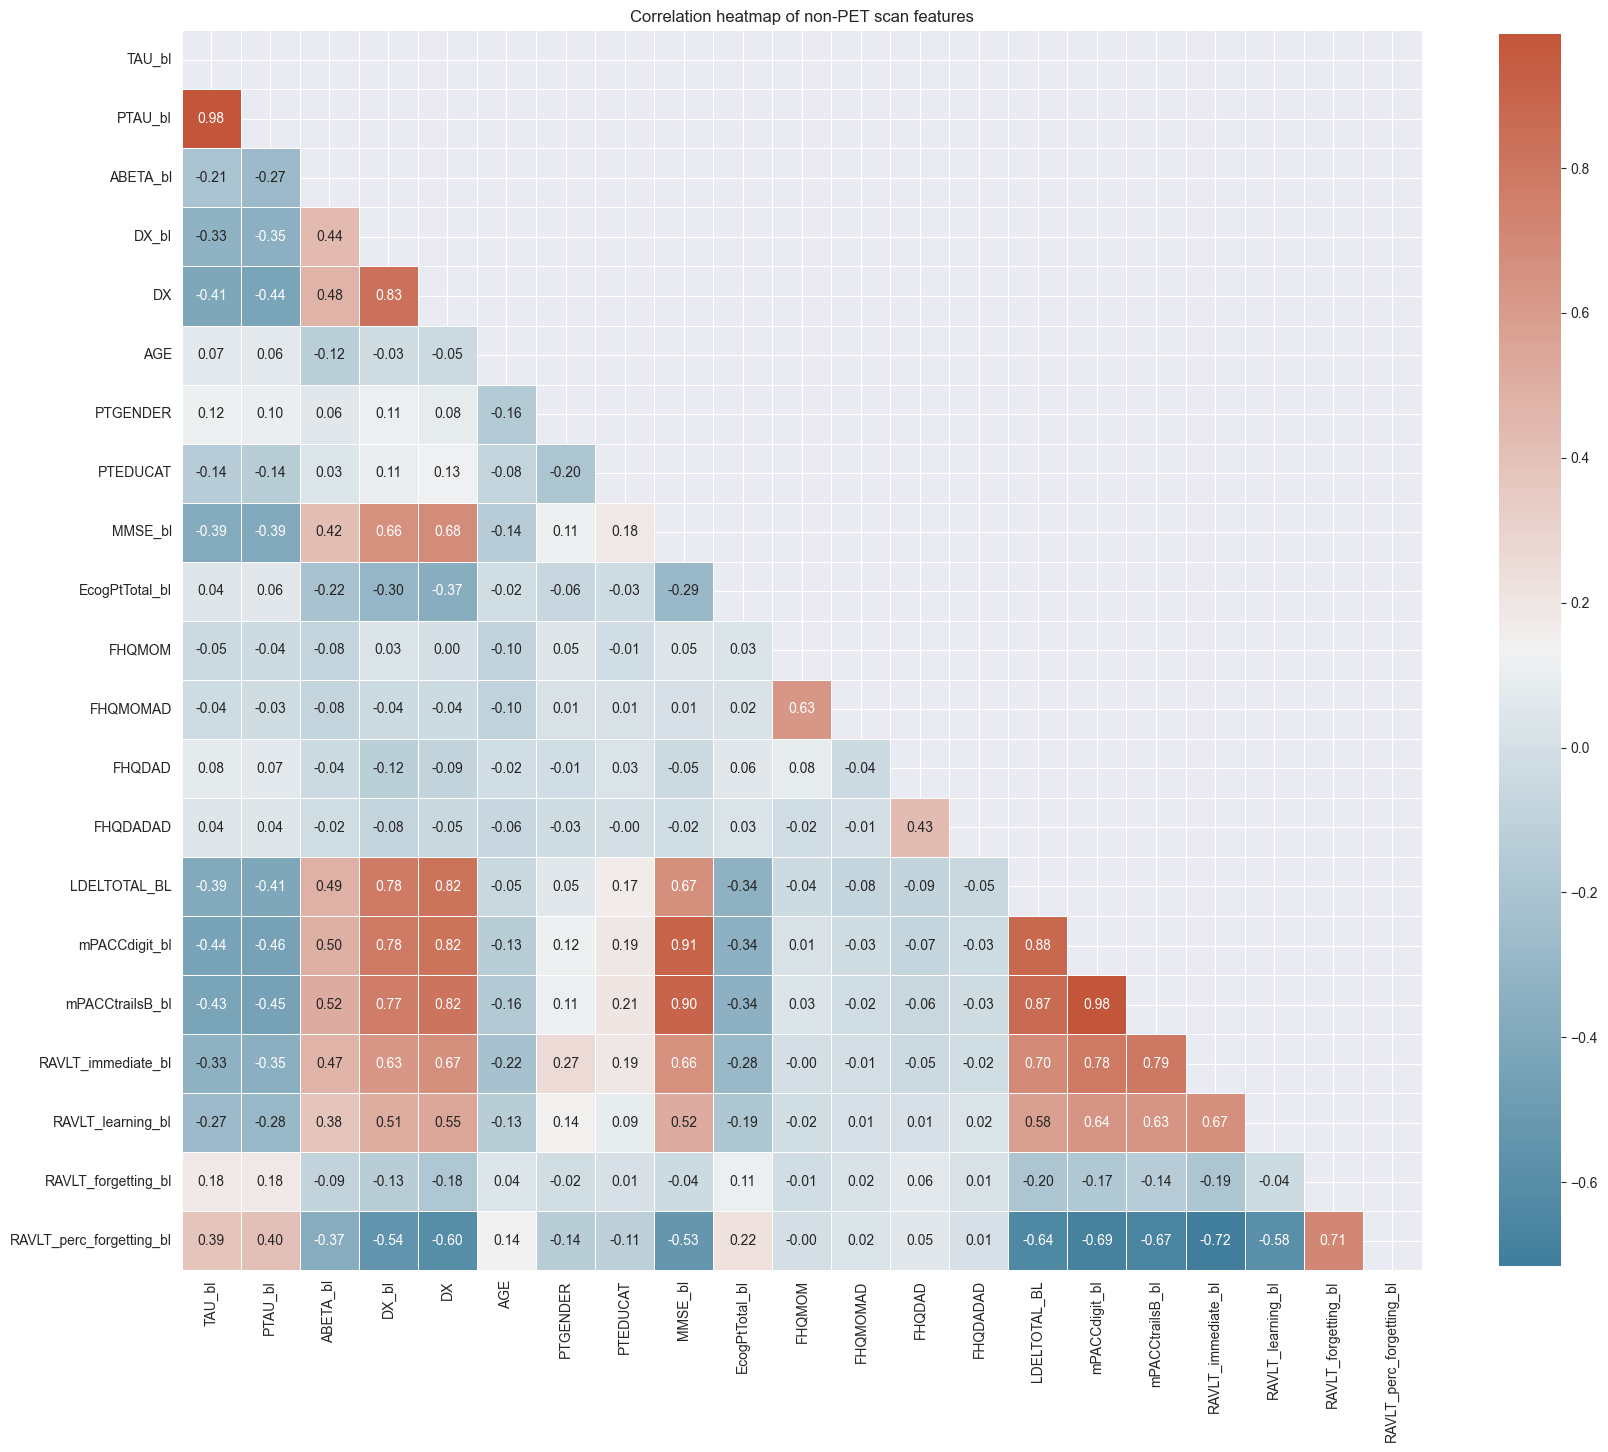

In [43]:
# Exclude the SUVr features from the correlation matrix
plotting_matrix_cols = [col for col in df.columns if 'SUV' not in col]
print(plotting_matrix_cols)

plotting_matrix = df[plotting_matrix_cols].corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(plotting_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(plotting_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation heatmap of non-PET scan features')
plt.show()

In [27]:
dx_labels = {0: 'AD', 1: 'MCI', 2: 'CN'}

def plot_pairwise_scatter_plot_with_highly_correlated_features(target, features, df):
  for col in features:
      plt.figure(figsize=(7, 4))
      ax = sns.scatterplot(data=df, x=col, y=target, hue='DX', palette='Set1')
      plt.title(f'Pairwise scatter plot b/w {col} and {target}')
      plt.xlabel(col)
      plt.ylabel(target)
      handles, labels = ax.get_legend_handles_labels()
      new_labels = [dx_labels.get(int(l), l) if l.isdigit() else l for l in labels]
      plt.legend(handles=handles, labels=new_labels, title='DX')
      plt.show()

Top 10 features highly correlated with 'DX': ['DX_bl', 'LDELTOTAL_BL', 'mPACCdigit_bl', 'mPACCtrailsB_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_perc_forgetting_bl', 'RAVLT_learning_bl', 'ABETA_bl', 'SUVr_Precuneus_L.nii']


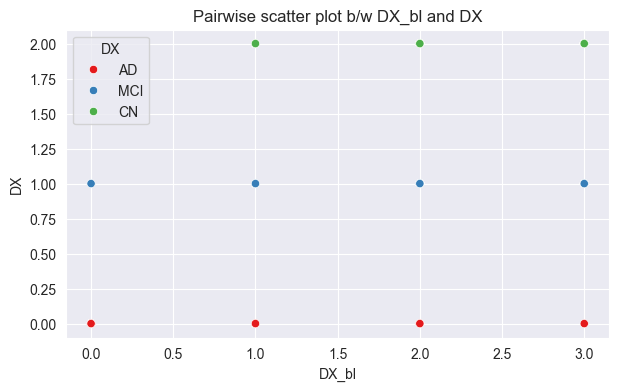

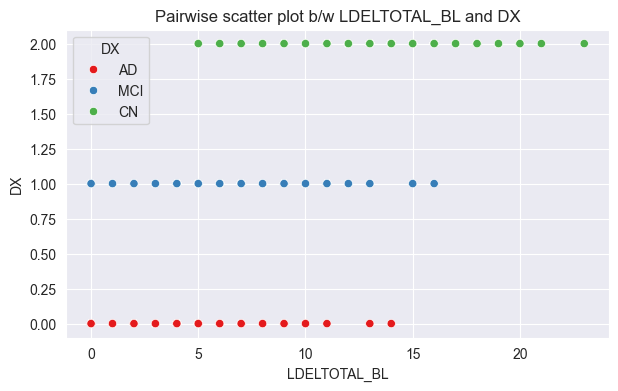

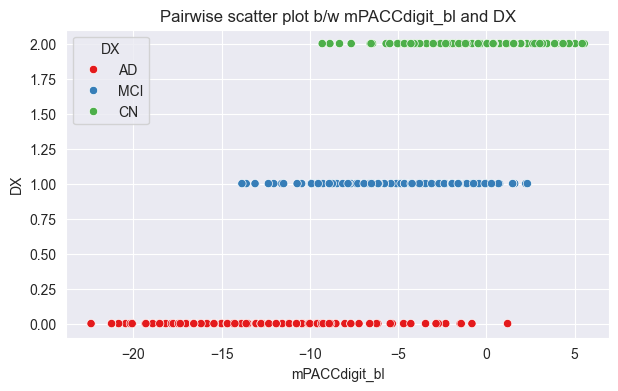

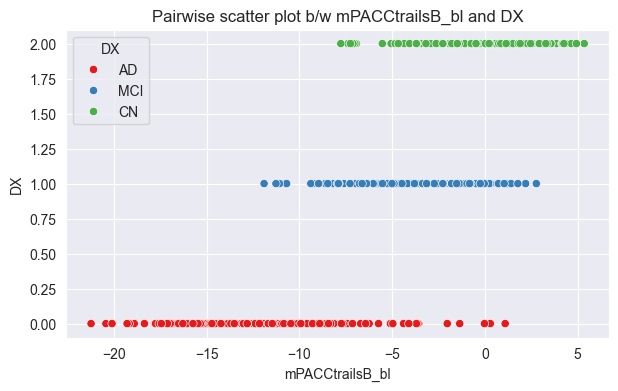

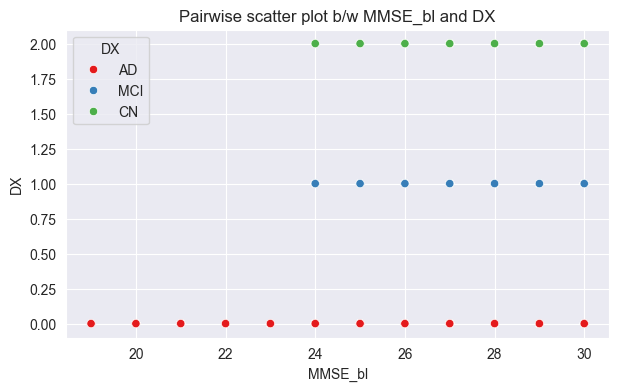

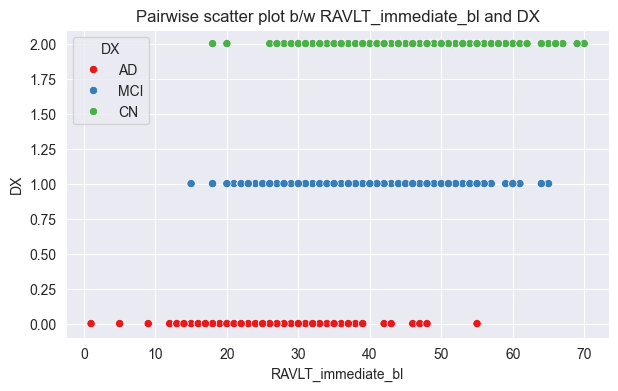

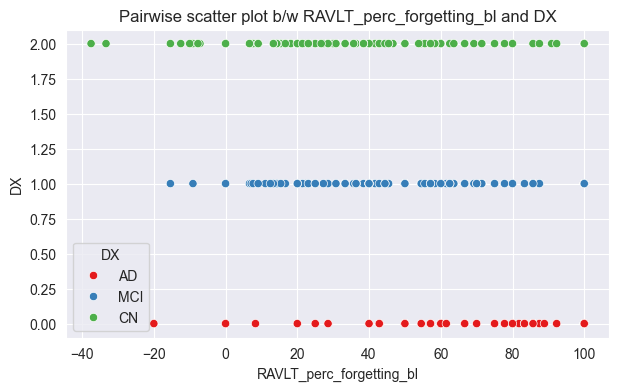

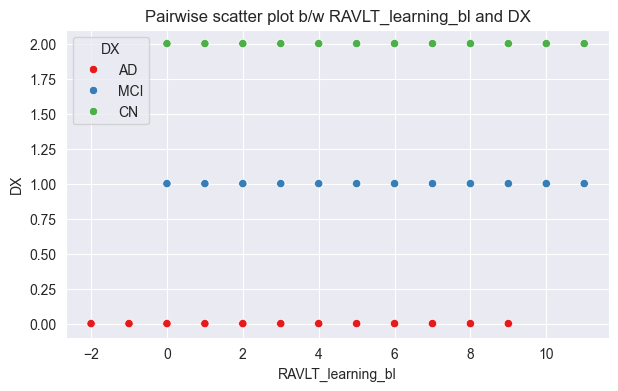

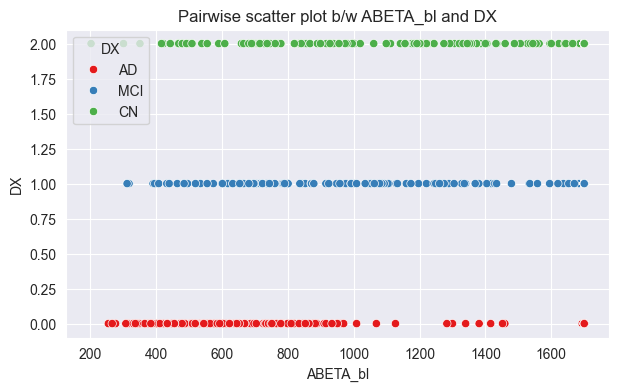

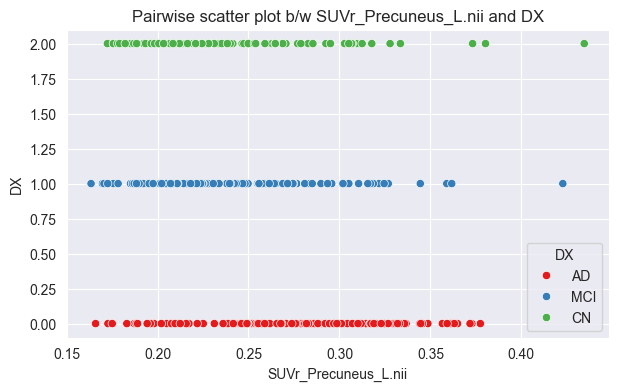

In [28]:
# Select the features from the correlation matrix that are highly correlated with 'DX'
highly_correlated_features = correlation_matrix['DX'].abs().sort_values(ascending=False).drop('DX')
print(f"Top 10 features highly correlated with 'DX': {highly_correlated_features.index.tolist()[:10]}")
plot_pairwise_scatter_plot_with_highly_correlated_features('DX', highly_correlated_features.index.tolist()[:10], df)

In [21]:
# Select the features from the correlation matrix that are highly correlated with 'EcogPtTotal_bl'
highly_correlated_features = correlation_matrix['EcogPtTotal_bl'].abs().sort_values(ascending=False).drop('EcogPtTotal_bl')
print(f"Top 10 Features highly correlated with 'EcogPtTotal_bl': {highly_correlated_features.index.tolist()[:10]}")

Top 10 Features highly correlated with 'EcogPtTotal_bl': ['DX', 'mPACCtrailsB_bl', 'mPACCdigit_bl', 'LDELTOTAL_BL', 'DX_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_perc_forgetting_bl', 'ABETA_bl', 'RAVLT_learning_bl']


In [22]:
# Select the features from the correlation matrix that are highly correlated with 'MMSE_bl'
highly_correlated_features = correlation_matrix['MMSE_bl'].abs().sort_values(ascending=False).drop('MMSE_bl')
print(f"Top 10 Features highly correlated with 'MMSE_bl': {highly_correlated_features.index.tolist()[:10]}")

Top 10 Features highly correlated with 'MMSE_bl': ['mPACCdigit_bl', 'mPACCtrailsB_bl', 'DX', 'LDELTOTAL_BL', 'DX_bl', 'RAVLT_immediate_bl', 'RAVLT_perc_forgetting_bl', 'RAVLT_learning_bl', 'ABETA_bl', 'SUVr_Lingual_L.nii']


In [23]:
# Select the features from the correlation matrix that are highly correlated with 'LDELTOTAL_BL'
highly_correlated_features = correlation_matrix['LDELTOTAL_BL'].abs().sort_values(ascending=False).drop('LDELTOTAL_BL')
print(f"Top 10 Features highly correlated with 'LDELTOTAL_BL': {highly_correlated_features.index.tolist()[:10]}")

Top 10 Features highly correlated with 'LDELTOTAL_BL': ['mPACCdigit_bl', 'mPACCtrailsB_bl', 'DX', 'DX_bl', 'RAVLT_immediate_bl', 'MMSE_bl', 'RAVLT_perc_forgetting_bl', 'RAVLT_learning_bl', 'ABETA_bl', 'SUVr_Precuneus_L.nii']


Top 10 Features highly correlated with 'ABETA_bl': ['SUVr_Precuneus_L.nii', 'SUVr_Precuneus_R.nii', 'SUVr_Parietal_Sup_L.nii', 'SUVr_Fusiform_L.nii', 'SUVr_Angular_L.nii', 'SUVr_ACC_sub_L.nii', 'SUVr_ACC_pre_L.nii', 'SUVr_Angular_R.nii', 'SUVr_Parietal_Inf_R.nii', 'SUVr_Fusiform_R.nii']


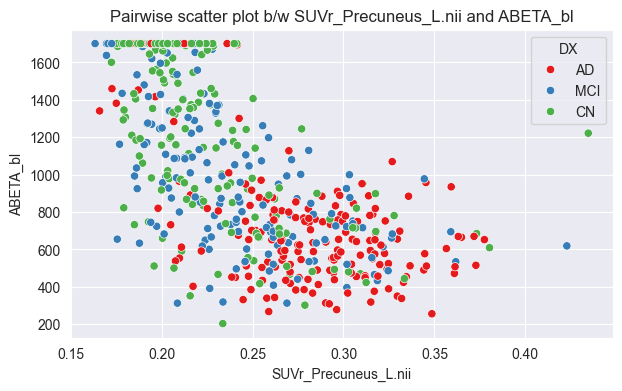

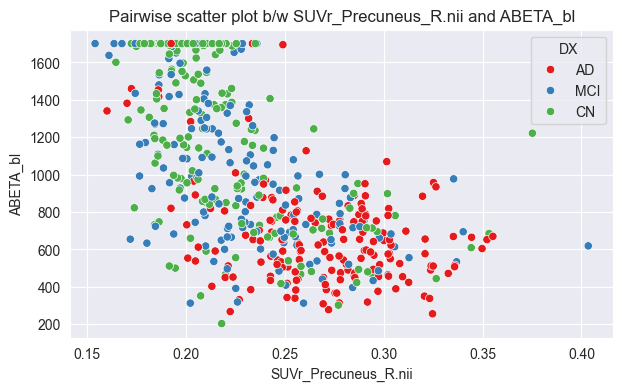

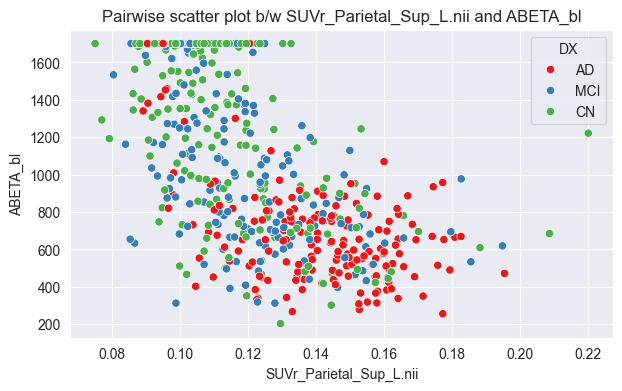

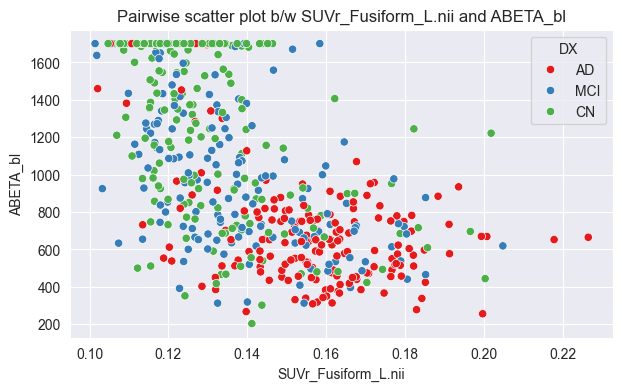

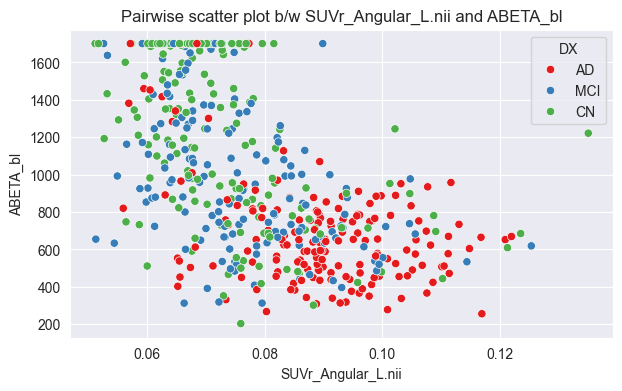

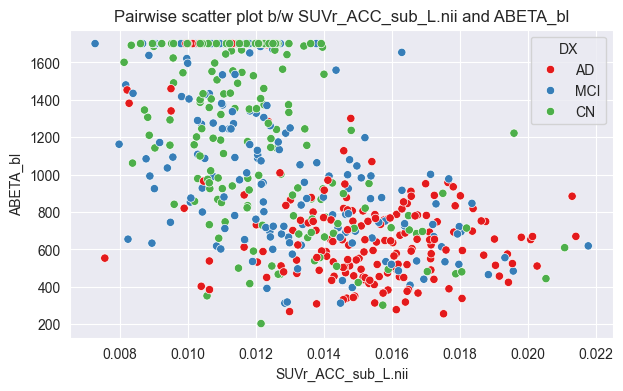

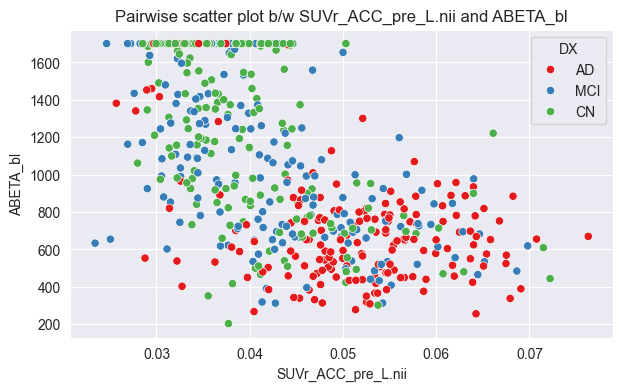

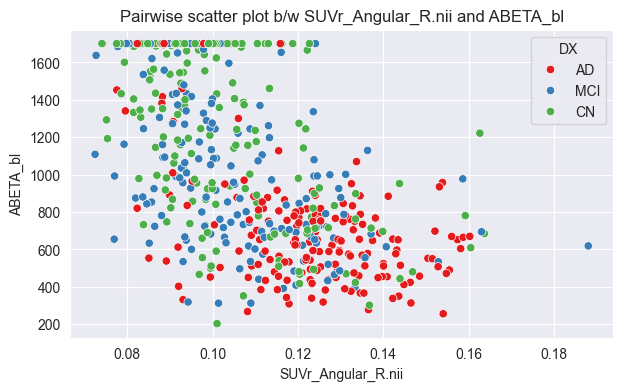

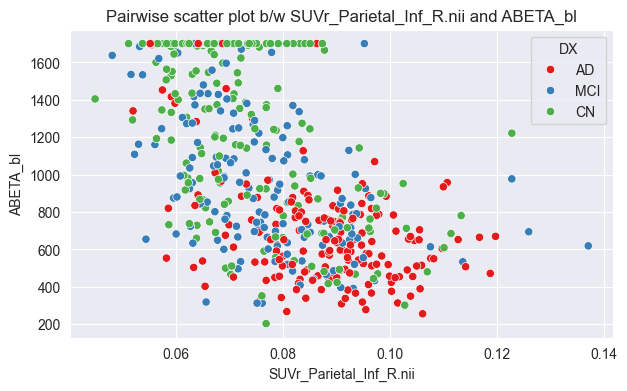

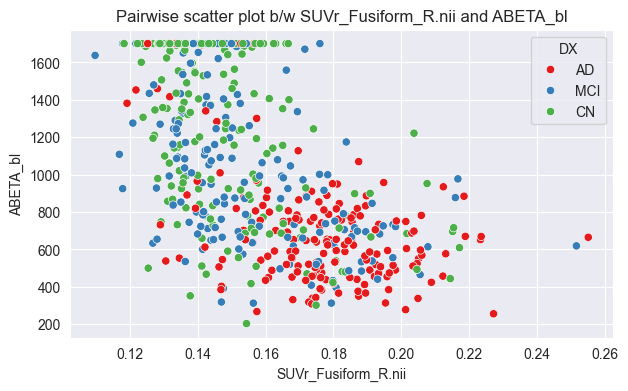

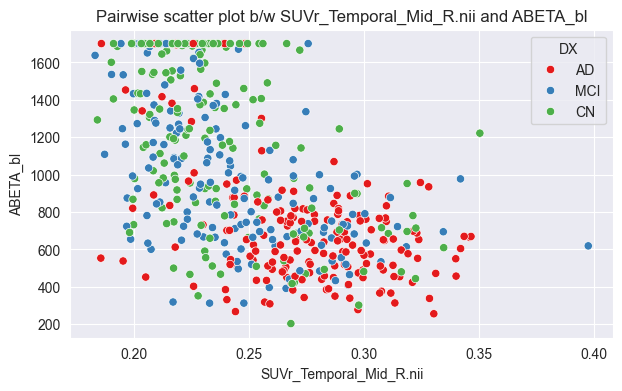

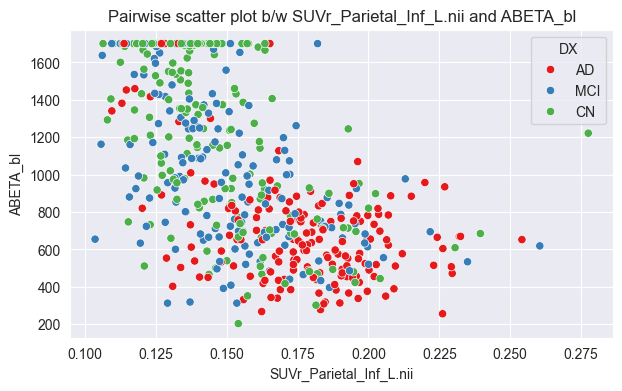

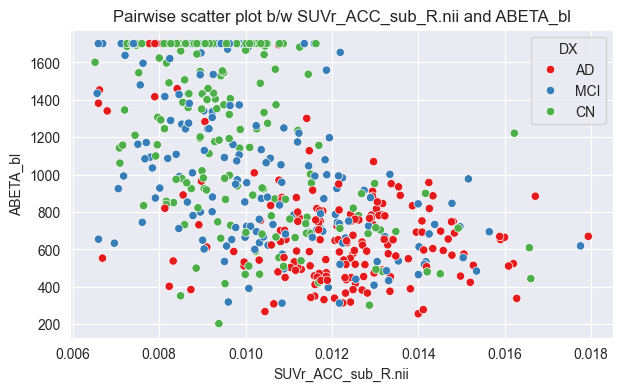

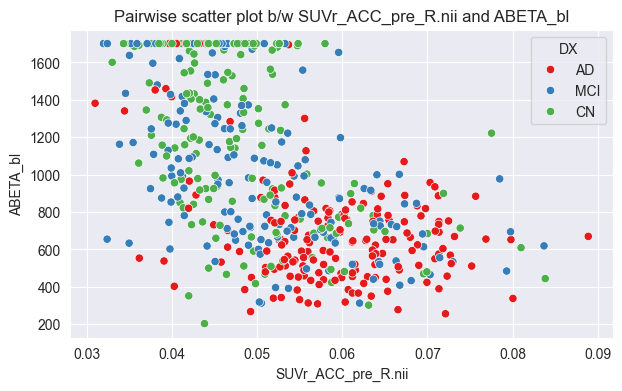

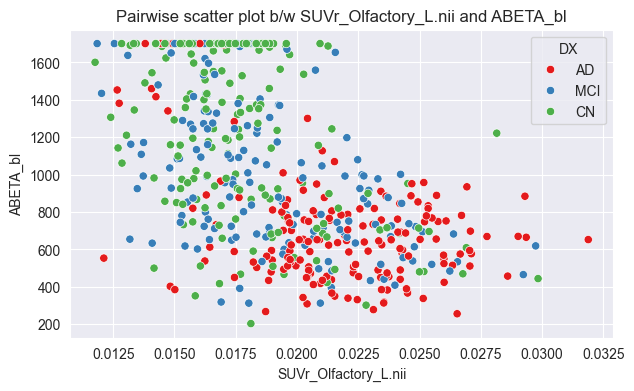

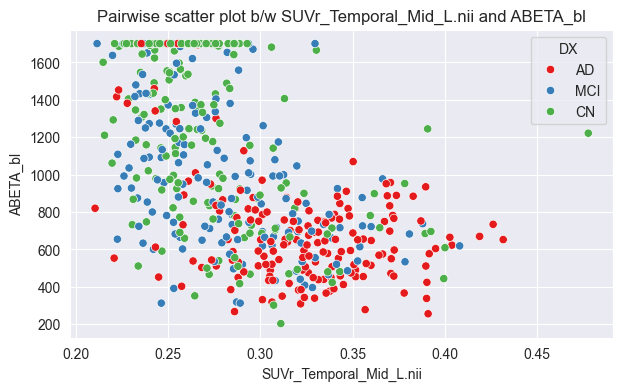

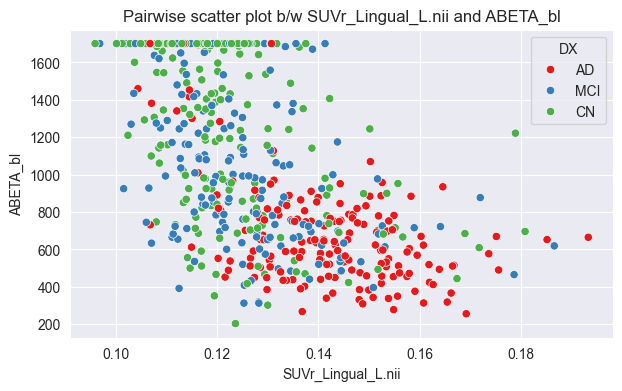

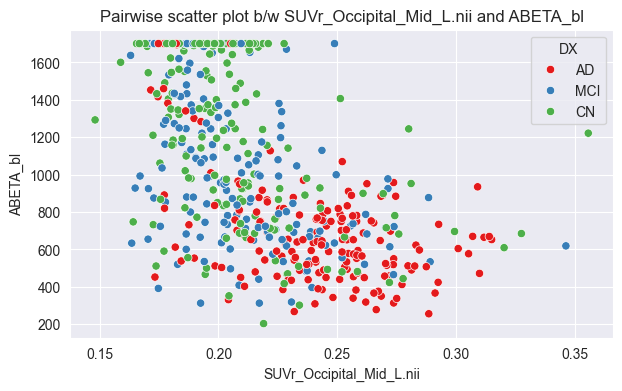

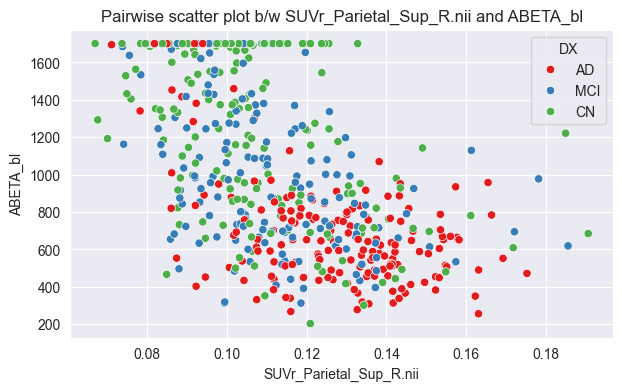

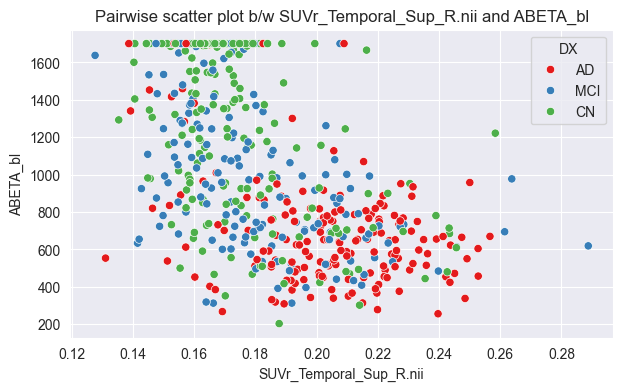

In [29]:
# Select the features from the correlation matrix that are highly correlated with 'ABETA_bl'
highly_correlated_features = correlation_matrix['ABETA_bl'].abs().sort_values(ascending=False).drop('ABETA_bl')
print(f"Top 10 Features highly correlated with 'ABETA_bl': {highly_correlated_features.index.tolist()[:10]}")
plot_pairwise_scatter_plot_with_highly_correlated_features('ABETA_bl', highly_correlated_features.index.tolist()[:20], df)

Top 10 Features highly correlated with 'PTAU_bl': ['TAU_bl', 'SUVr_Frontal_Med_Orb_L.nii', 'SUVr_ACC_pre_L.nii', 'SUVr_Temporal_Mid_L.nii', 'SUVr_Rectus_L.nii', 'SUVr_Temporal_Sup_L.nii', 'SUVr_Temporal_Inf_L.nii', 'SUVr_Frontal_Med_Orb_R.nii', 'SUVr_Rolandic_Oper_L.nii', 'SUVr_Frontal_Inf_Orb_2_L.nii']


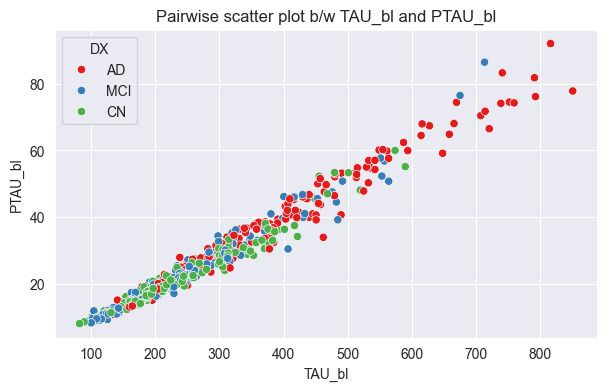

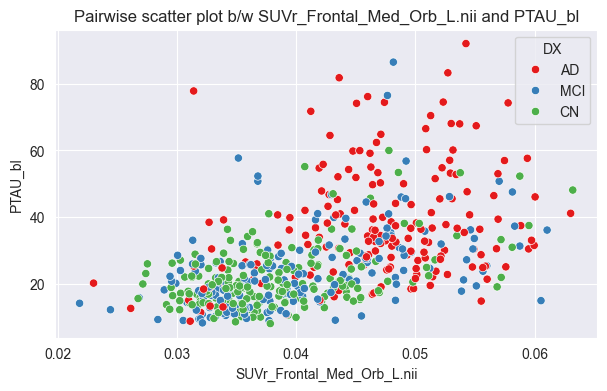

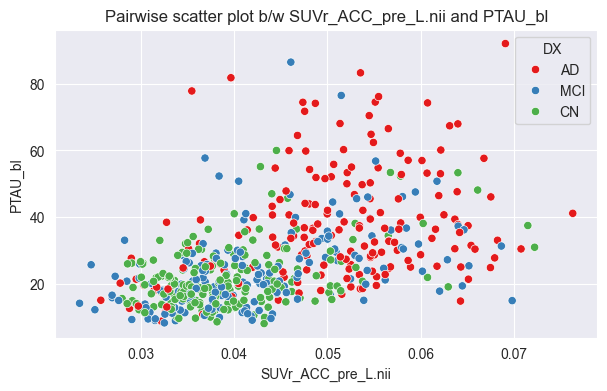

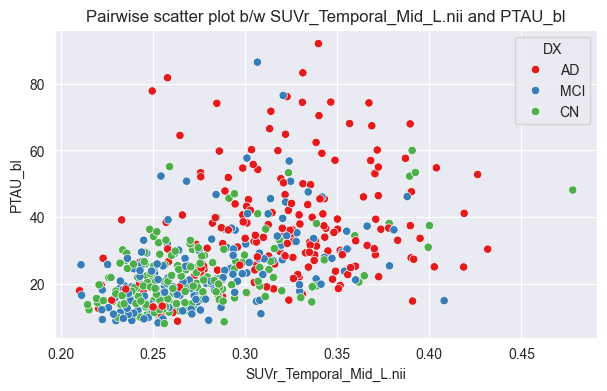

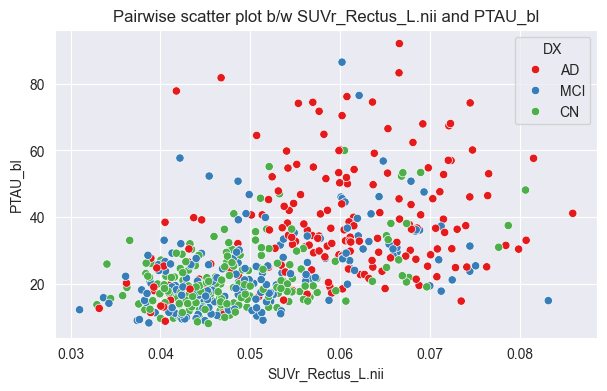

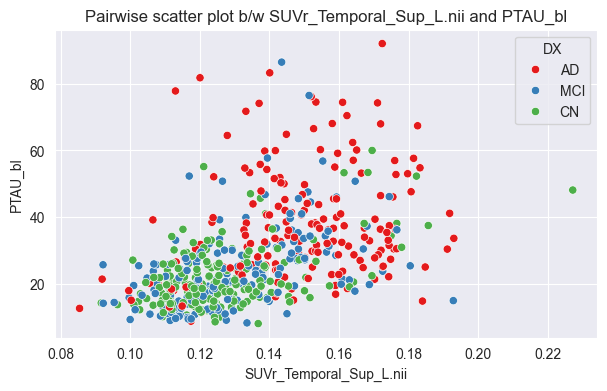

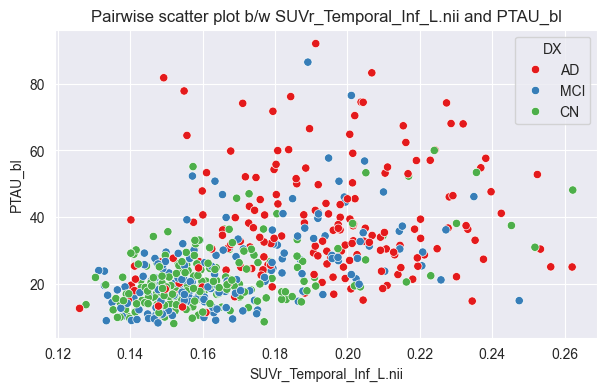

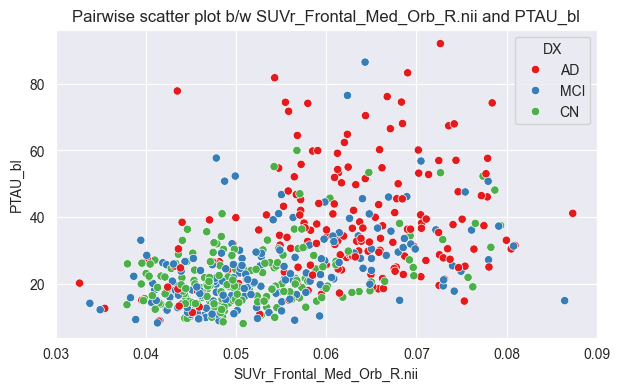

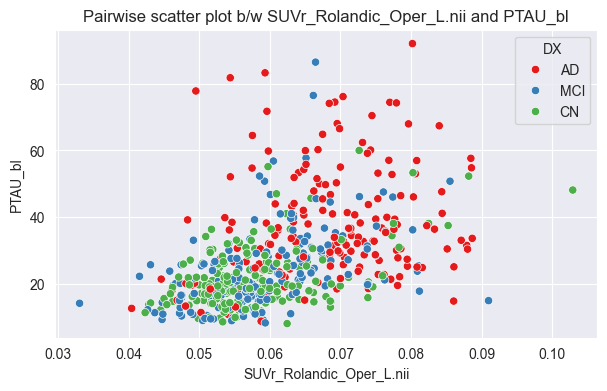

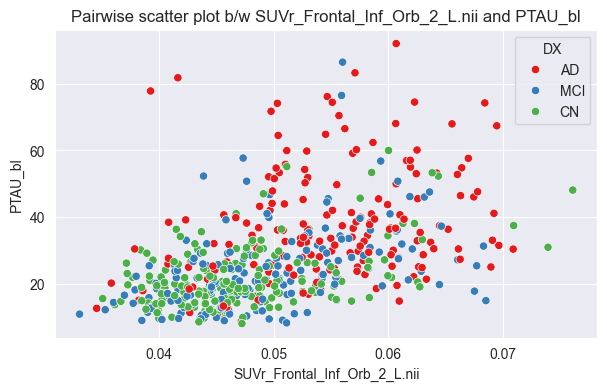

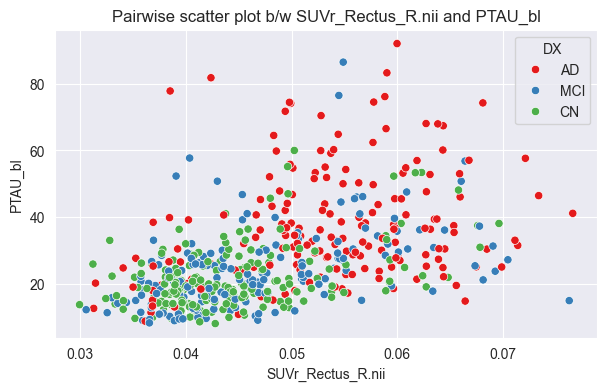

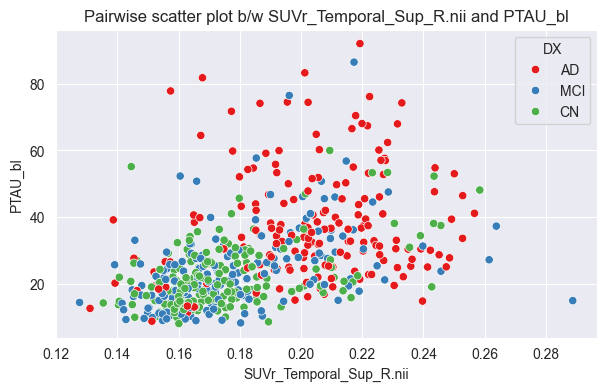

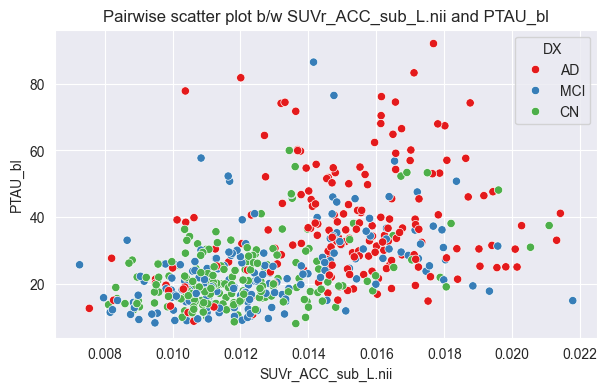

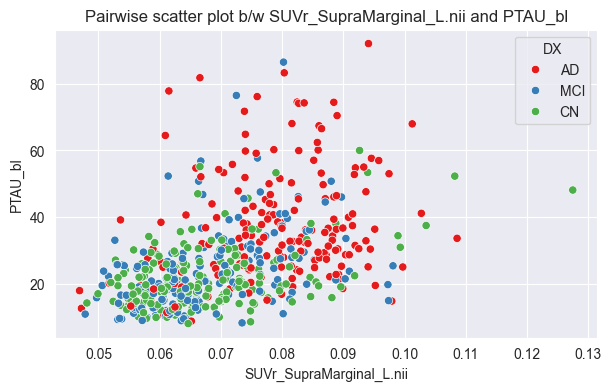

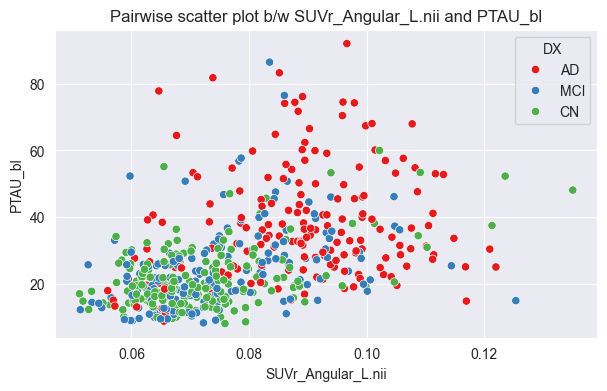

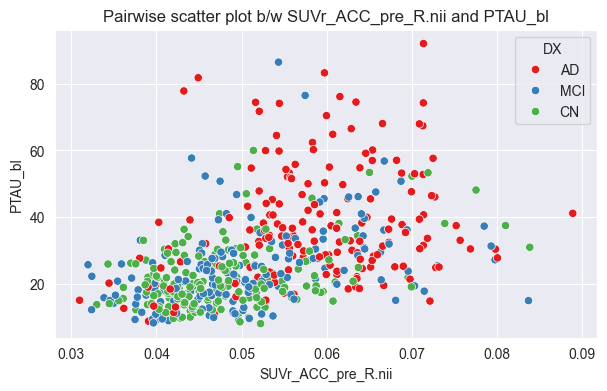

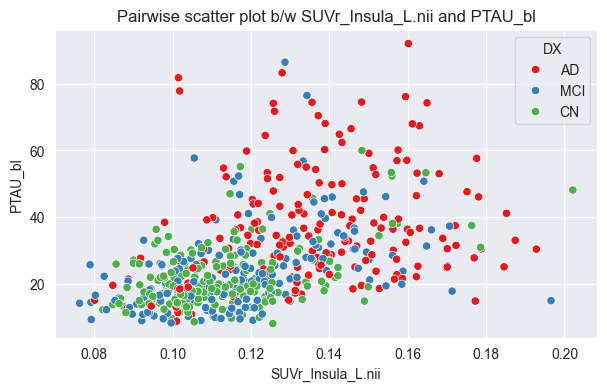

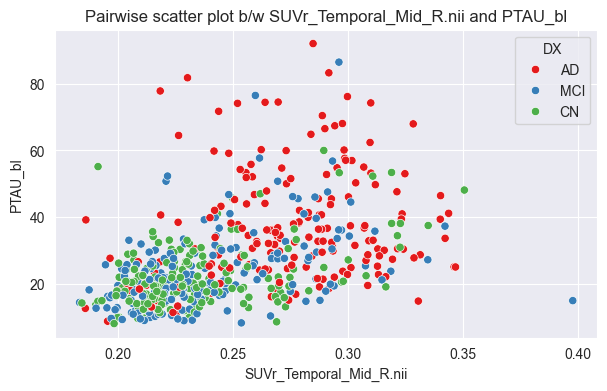

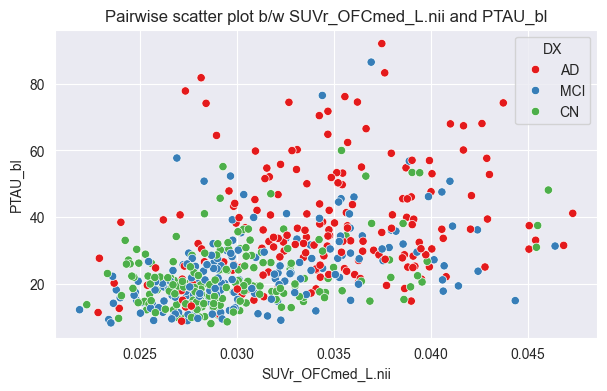

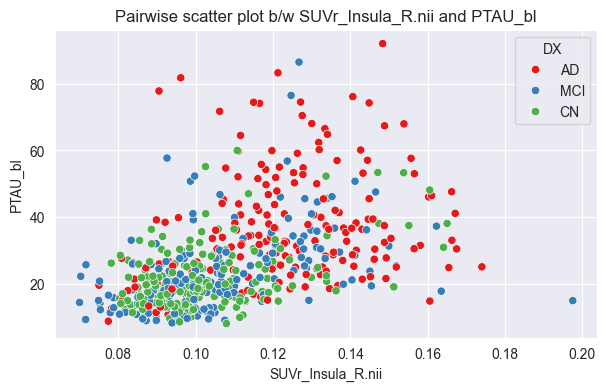

In [30]:
# Select the features from the correlation matrix that are highly correlated with 'PTAU_bl'
highly_correlated_features = correlation_matrix['PTAU_bl'].abs().sort_values(ascending=False).drop('PTAU_bl')
print(f"Top 10 Features highly correlated with 'PTAU_bl': {highly_correlated_features.index.tolist()[:10]}")
plot_pairwise_scatter_plot_with_highly_correlated_features('PTAU_bl', highly_correlated_features.index.tolist()[:20], df)

Top 10 Features highly correlated with 'TAU_bl': ['PTAU_bl', 'SUVr_Frontal_Med_Orb_L.nii', 'SUVr_ACC_pre_L.nii', 'SUVr_Temporal_Mid_L.nii', 'SUVr_Temporal_Sup_L.nii', 'SUVr_Rectus_L.nii', 'mPACCdigit_bl', 'mPACCtrailsB_bl', 'SUVr_Rolandic_Oper_L.nii', 'SUVr_Temporal_Inf_L.nii']


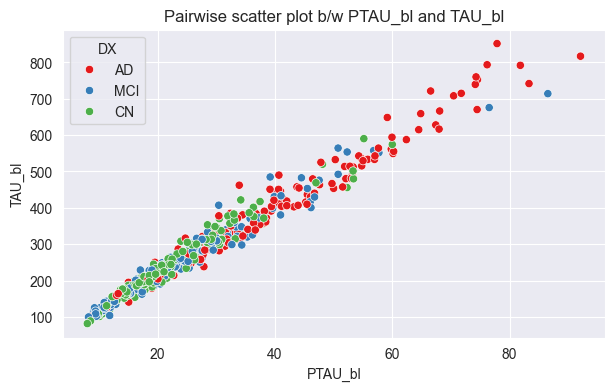

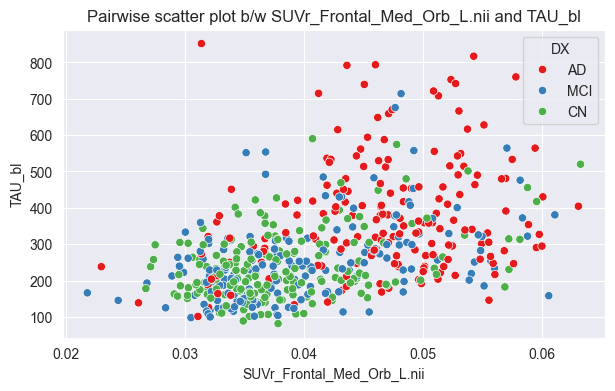

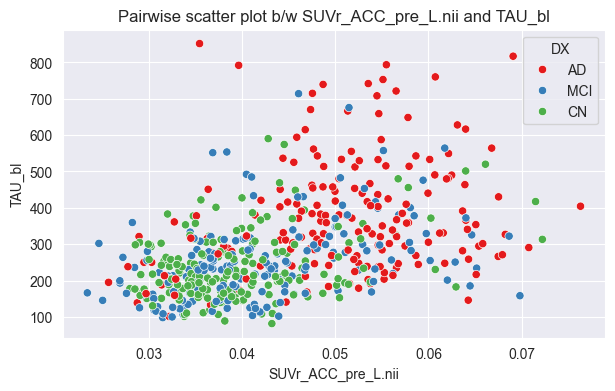

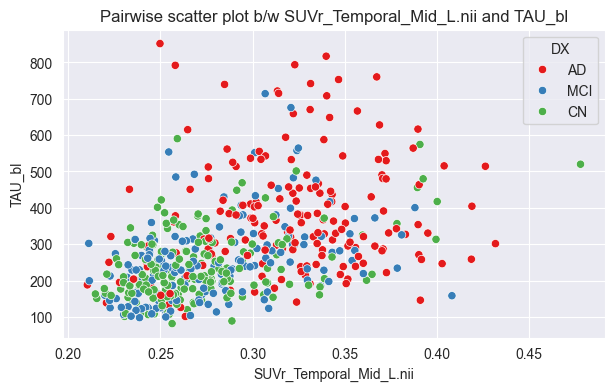

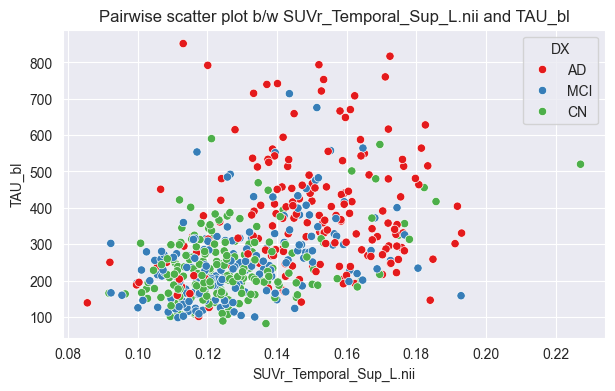

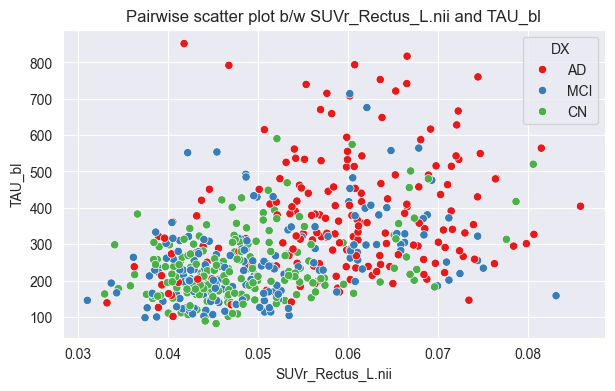

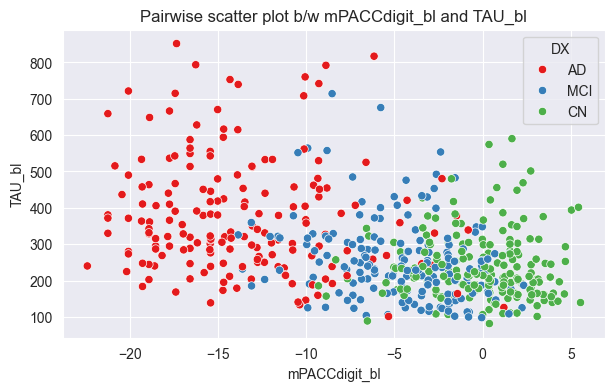

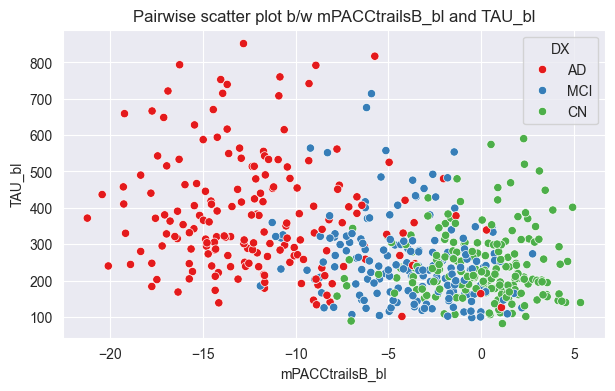

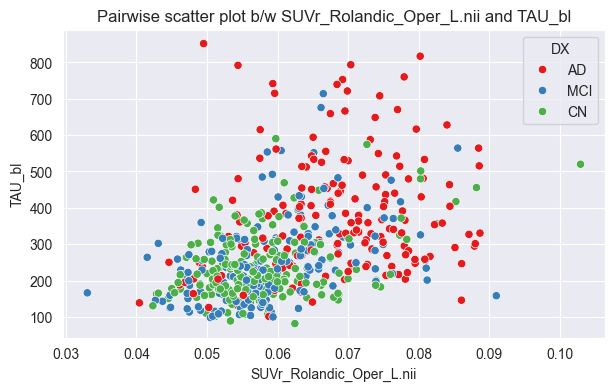

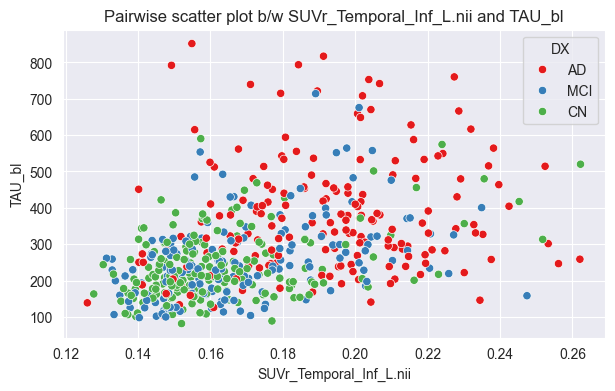

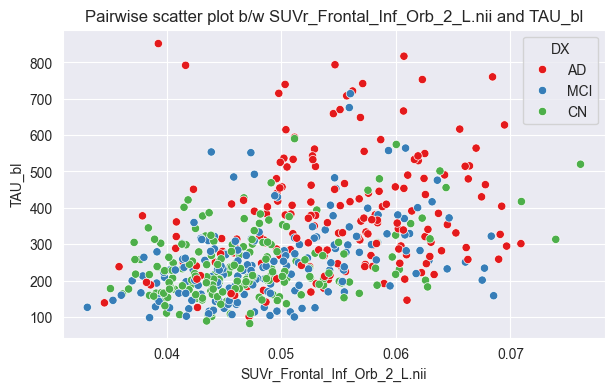

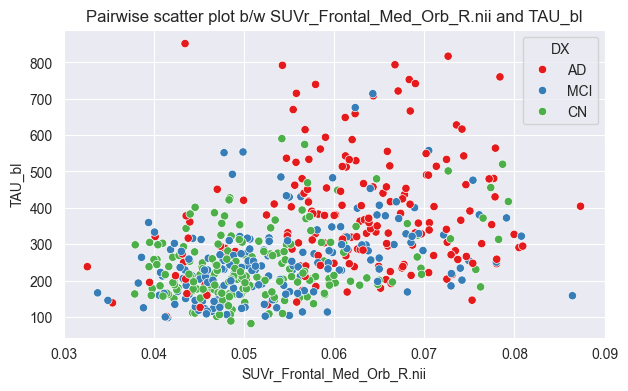

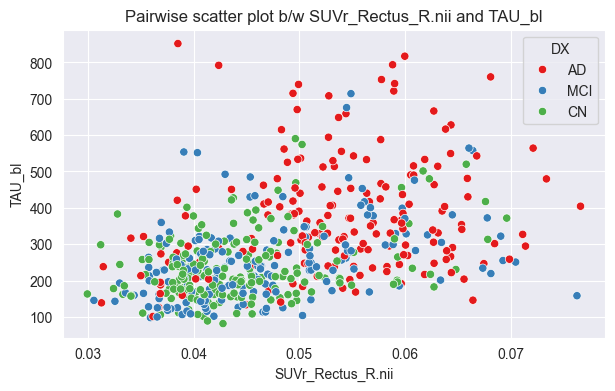

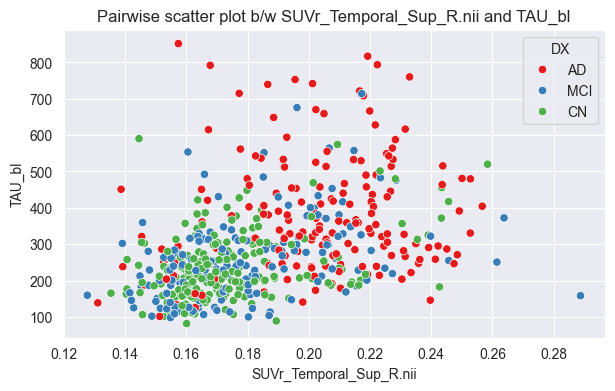

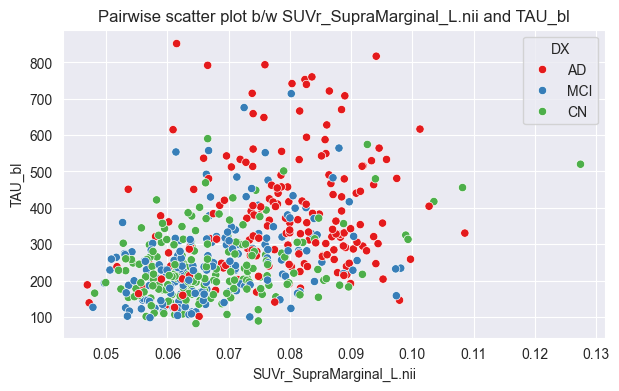

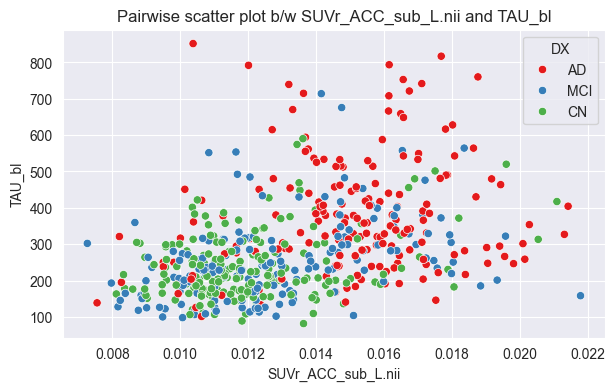

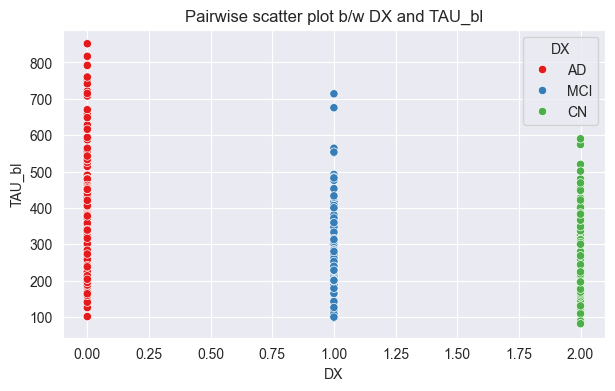

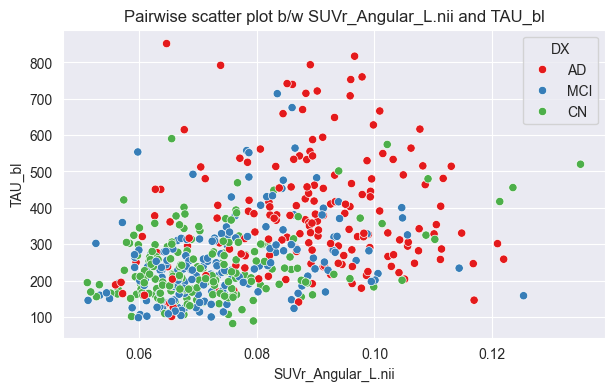

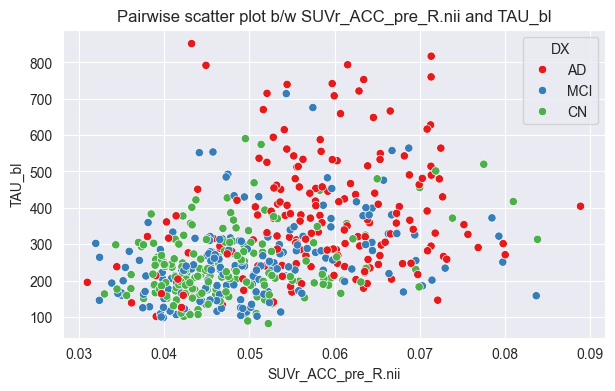

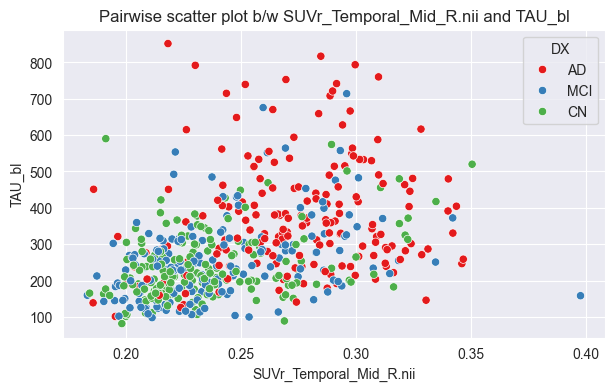

In [31]:
# Select the features from the correlation matrix that are highly correlated with 'TAU_bl'
highly_correlated_features = correlation_matrix['TAU_bl'].abs().sort_values(ascending=False).drop('TAU_bl')
print(f"Top 10 Features highly correlated with 'TAU_bl': {highly_correlated_features.index.tolist()[:10]}")
plot_pairwise_scatter_plot_with_highly_correlated_features('TAU_bl', highly_correlated_features.index.tolist()[:20], df)